<a href="https://github.com/hayashiyus/First-steps-towards-Deep-Learning/blob/main/20%20Linear-regression-models.ipynb">
 <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
#@title install packages
!pip install watermark
!pip install pymc3

In [17]:
import mplcyberpunk

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import arviz as az
import pymc3 as pm
from scipy import stats
import torch
import gpytorch
from gpytorch.models import ExactGP

In [19]:
import warnings
warnings.simplefilter('ignore')

### **1.　線形回帰モデル**
線形回帰モデル向けの人工データを作り，人工データを最もよく説明する（＝訓練誤差の少ない）係数パラメータを求めよう

##### **問1：線形回帰モデル向け人工データの作成**
観測データを生成する真のモデルが y = w0 + w1 * x + ε の場合，真のモデルから50個のサンプルを生成してください．<br>
また，作成した人工データをプロットしてください．ただし，係数パラメータ w0, w1 の値は自由に決めて良いとします．

##### **例1**

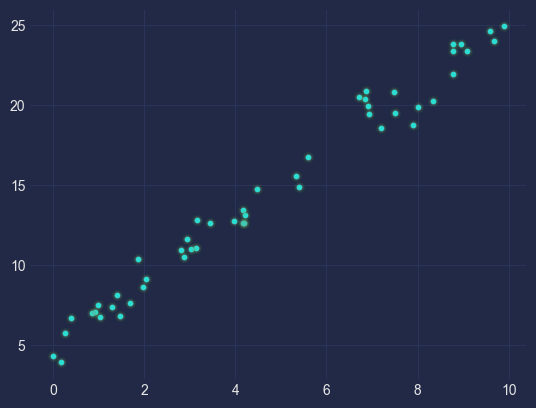

In [20]:
# 真のパラメータ
true_w0 = 5.0
true_w1 = 2.0

# 人工データ（観測データ）
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
# rng.randn(50)　は標準正規分布に従う乱数を50個生成
y = true_w0 + true_w1 * x + rng.randn(50)

plt.style.use("cyberpunk")
plt.scatter(x, y, s=10)
mplcyberpunk.make_scatter_glow()

##### **回答欄1**
真のパラメータを好きな値に設定して，人工データを作成してください．

In [ ]:
# 真のパラメータ
true_w0 =　
true_w1 =　 

# 人工データ（観測データ）
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
# rng.randn(50)　は標準正規分布に従う乱数を50個生成
y = true_w0 + true_w1 * x + rng.randn(50)

plt.style.use("cyberpunk")
plt.scatter(x, y, s=10)
mplcyberpunk.make_scatter_glow()

##### **問2：線形回帰モデルの学習**
問1で作成した人工データを観測データとみなして，線形回帰モデルの訓練を行なってください．<br>
また，訓練の結果得られた学習済みモデルの予測値と観測データをプロットしてください．

##### **例2**

5.001422914446792
[2.02720881]


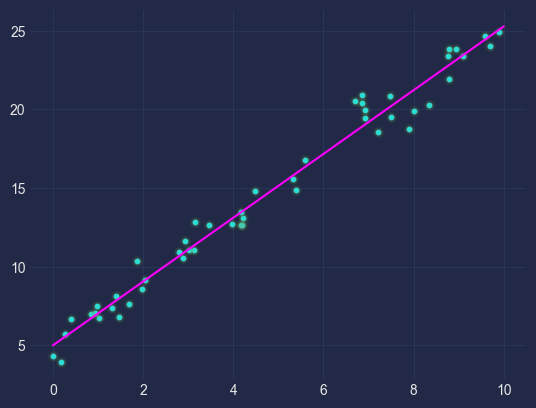

In [21]:
from sklearn.linear_model import LinearRegression

# scikit-learnのLinearRegressionクラスからインスタンスを呼び出す
model = LinearRegression(fit_intercept=True)

# 過去のデータを最もよく説明する最適なパラメータを探索
# y = w0 + w1x  の w0～w1 を算出
model.fit(x[:, np.newaxis], y)

# モデルが推定したパラメータ値を確認
# 切片(バイアス)　w0
print(model.intercept_)
# 係数パラメータ　w1
print(model.coef_)

# 最適なパラメータを使って出力の予測値を生成
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, s=10)
plt.plot(xfit, yfit, color='magenta')
mplcyberpunk.make_scatter_glow()

##### **回答欄2**
モデルに最適なパラメータを推定させ，推定されたパラメータをprint()で表示してください．

In [ ]:
from sklearn.linear_model import LinearRegression

# scikit-learnのLinearRegressionクラスからインスタンスを呼び出す
model = LinearRegression(fit_intercept=True)

# 過去のデータを最もよく説明する最適なパラメータを探索
# y = w0 + w1x  の w0～w1 を算出
model.fit( , )

# モデルが推定したパラメータ値を確認
# 切片(バイアス)　w0
print()
# 係数パラメータ　w1
print()

# 最適なパラメータを使って出力の予測値を生成
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, s=10)
plt.plot(xfit, yfit, color='magenta')
mplcyberpunk.make_scatter_glow()

### 1-1. 線形基底関数モデル
##### **問3：線形基底関数モデル**
真のモデルを3次関数＋ノイズと設定して,人工データを50個作成してください．<br>
また，作成した人工データをプロットしてください．

##### **例3**

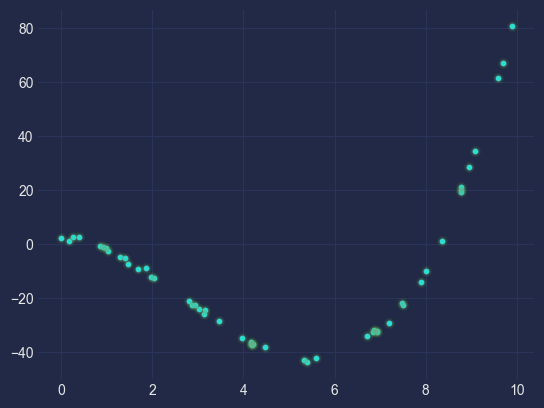

In [22]:
# 真のパラメータ
true_w0 = 3.0
true_w1 = -1.5
true_w2 = 4.0
true_w3 = 0.5

# 人工データ（観測データ）
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = true_w0 + true_w1 * x - true_w2 * x**2 + true_w3 * x**3 + rng.randn(50)

plt.style.use("cyberpunk")
plt.scatter(x, y, s=10)
mplcyberpunk.make_scatter_glow()

##### **回答欄3**
標準正規分布に従う乱数を50個作成し，真のモデル（3次関数＋ノイズ）のノイズ部分を生成してください．

In [ ]:
# 真のパラメータ
true_w0 = 3.0
true_w1 = -1.5
true_w2 = 4.0
true_w3 = 0.5

# 人工データ（観測データ）
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = true_w0 + true_w1 * x - true_w2 * x**2 + true_w3 * x**3 + 

plt.style.use("cyberpunk")
plt.scatter(x, y, s=10)
mplcyberpunk.make_scatter_glow()

##### **Tips**
多項式基底関数で線形回帰するために観測データを基底関数の数と同じ大きさの次元をもつベクトルに変換する

【origin】
X = [[x1], [x2], [x3]]

【transform】
X = [[1, x1, x1^2], [1, x2, x2^2], [1, x3, x3^2]]

##### **問4：線形基底関数モデル**
複数の特徴量（説明変数）をもつ線形回帰モデルで予測するために，入力データを fit_transform() を使って加工してください．<br>
また，作成した人工データをプロットしてください．

##### **例4**

2.742088573436652
[ 0.         -1.28253516 -4.02469367  0.50058973]


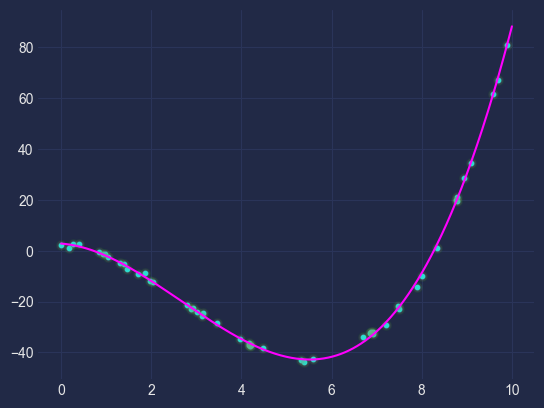

In [23]:
from sklearn.preprocessing import PolynomialFeatures

# 観測データを3次元に変換
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x[:, np.newaxis])

# scikit-learnのLinearRegressionクラスからインスタンスを呼び出す
model = LinearRegression(fit_intercept=True)

# 過去のデータを最もよく説明する最適なパラメータを探索
# y = w0 + w1x + w2x^2 + w3x^3  の w0～w3 を算出
model.fit(x_poly, y)

# モデルが推定したパラメータ値を確認
# 切片(バイアス)　w0
print(model.intercept_)
# 係数パラメータ　w1〜w3
print(model.coef_)

# 最適なパラメータを使って出力の予測値を生成
xfit = np.linspace(0, 10, 1000)
xfit_poly = polynomial_features.fit_transform(xfit[:, np.newaxis])
yfit_poly = model.predict(xfit_poly)

plt.scatter(x, y, s=10)
plt.plot(xfit, yfit_poly, color='magenta')
mplcyberpunk.make_scatter_glow()

##### **回答欄4**
多項式基底関数で線形回帰するために,観測データを基底関数の数と同じ大きさの次元をもつベクトルに変換してください．

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 観測データを3次元に変換
polynomial_features= PolynomialFeatures(degree=)
x_poly = polynomial_features._(x[:, np.newaxis])

# scikit-learnのLinearRegressionクラスからインスタンスを呼び出す
model = LinearRegression(fit_intercept=True)

# 過去のデータを最もよく説明する最適なパラメータを探索
# y = w0 + w1x + w2x^2 + w3x^3  の w0～w3 を算出
model.fit(x_poly, y)

# モデルが推定したパラメータ値を確認
# 切片(バイアス)　w0
print(model.intercept_)
# 係数パラメータ　w1〜w3
print(model.coef_)

# 最適なパラメータを使って出力の予測値を生成
xfit = np.linspace(0, 10, 1000)
xfit_poly = polynomial_features.fit_transform(xfit[:, np.newaxis])
yfit_poly = model.predict(xfit_poly)

plt.scatter(x, y, s=10)
plt.plot(xfit, yfit_poly, color='magenta')
mplcyberpunk.make_scatter_glow()

### 過学習の例

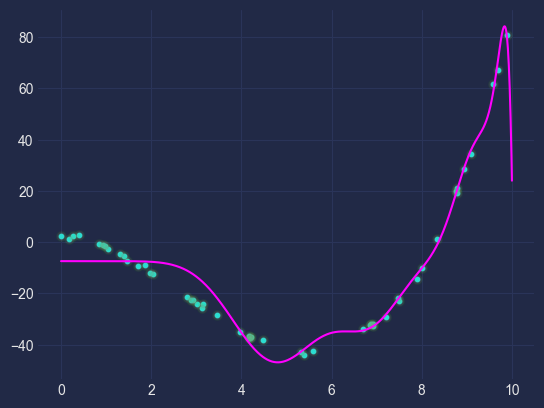

In [24]:
# 観測データを20次元に変換
polynomial_features= PolynomialFeatures(degree=20)
x_poly = polynomial_features.fit_transform(x[:, np.newaxis])

# scikit-learnのLinearRegressionクラスからインスタンスを呼び出す
model = LinearRegression(fit_intercept=True)

# 過去のデータを最もよく説明する最適なパラメータを探索
# y = w0 + w1x + w2x^2 + ... + w20x^20 の w0～w20 を算出
model.fit(x_poly, y)

# 最適なパラメータを使って出力の予測値を生成
xfit = np.linspace(0, 10, 1000)
xfit_poly = polynomial_features.fit_transform(xfit[:, np.newaxis])
yfit_poly = model.predict(xfit_poly)

plt.scatter(x, y, s=10)
plt.plot(xfit, yfit_poly, color='magenta')
mplcyberpunk.make_scatter_glow()

### 2.　一般化線形モデル（ポアソン回帰）

(array([  0., 137.,   0., 273.,   0., 264.,   0., 179.,   0.,  91.,   0.,
         32.,   0.,  18.,   0.,   5.,   0.,   0.,   0.,   1.,   0.]),
 array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,
         5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 21 artists>)

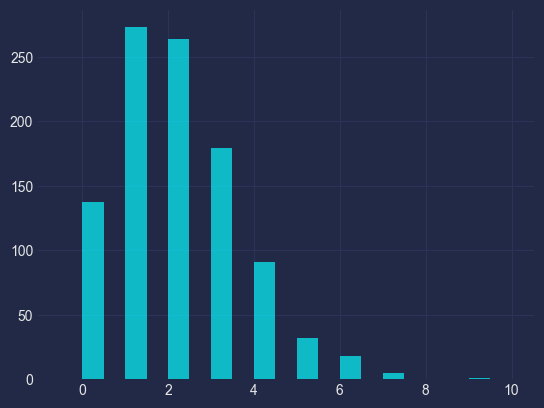

In [25]:
from sklearn.linear_model import TweedieRegressor

k = stats.poisson.rvs(2, size=1000, random_state=0)

# 階級値の設定
bins = np.arange(-0.5, 10.5, 0.5)

plt.style.use("cyberpunk")
plt.hist(k, bins, rwidth=1.0, alpha=0.7)

##### **問5：ポアソン回帰**
ノイズが標準正規分布に従わず，ポアソン分布に従う人工データを50個作成してください．<br>
また，作成した人工データをプロットしてください．ただし，リンク関数は対数関数（逆リンク関数は指数関数），線形予測子は w0 + w1 * x とします．

##### **例5**

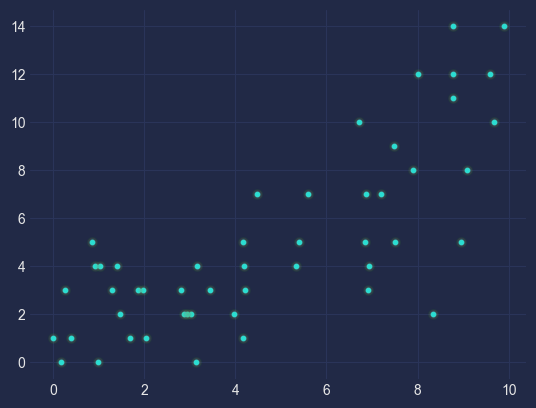

In [26]:
# 真のパラメータ
true_w0 = 0.5
true_w1 = 0.2

# 人工データ（観測データ）
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = stats.poisson(mu = np.exp(true_w0 + true_w1 * x)).rvs()

plt.style.use("cyberpunk")
plt.scatter(x, y, s=10)
mplcyberpunk.make_scatter_glow()

##### **回答欄5**
真のパラメータを好きな値に設定して，リンク関数が対数関数（逆リンク関数が指数関数），線形予測子が w0 + w1 * x のポアソン分布に従うノイズをもつ人工データを50個作成してください．

In [ ]:
# 真のパラメータ
true_w0 = 
true_w1 = 

# 人工データ（観測データ）
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = stats.poisson(mu = np._()).rvs()

plt.style.use("cyberpunk")
plt.scatter(x, y, s=10)
mplcyberpunk.make_scatter_glow()

##### **問6：リンク関数を恒等関数（y=x）に設定した場合のポアソン回帰モデル**
ポアソン回帰モデルを作成し，観測データから推測した線形予測子のパラメータを確認してください．<br>

##### **例6**

0.9661863030385378
[0.85096817]


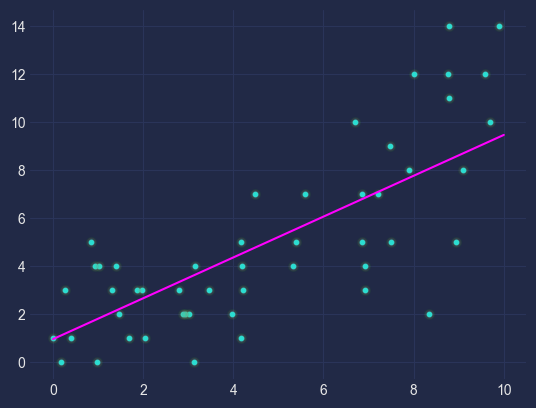

In [27]:
# scikit-learnのTweedieRegressorクラスからインスタンスを呼び出す
model = TweedieRegressor(fit_intercept=True, power=0, link='identity')

# 過去のデータを最もよく説明する最適なパラメータを探索
# 線形予測子 w0 + w1x  の w0～w1 を算出
model.fit(x[:, np.newaxis], y)

# モデルが推定したパラメータ値を確認
# 切片(バイアス)　w0
print(model.intercept_)
# 係数パラメータ　w1
print(model.coef_)

# 最適なパラメータを使って出力の予測値を生成
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, s=10)
plt.plot(xfit, yfit, color='magenta')
mplcyberpunk.make_scatter_glow()

##### **回答欄6**
scikit-learnのTweedieRegressorクラスの解説ページを確認し，ポアソン回帰モデルに対応するパラメータを power=?に，リンク関数を恒等関数（y=x）に設定してください．<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html

In [ ]:
# scikit-learnのTweedieRegressorクラスからインスタンスを呼び出す
model = TweedieRegressor(fit_intercept=True, power=, link=)

# 過去のデータを最もよく説明する最適なパラメータを探索
# 線形予測子 w0 + w1x  の w0～w1 を算出
model.fit(x[:, np.newaxis], y)

# モデルが推定したパラメータ値を確認
# 切片(バイアス)　w0
print(model.intercept_)
# 係数パラメータ　w1
print(model.coef_)

# 最適なパラメータを使って出力の予測値を生成
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, s=10)
plt.plot(xfit, yfit, color='magenta')
mplcyberpunk.make_scatter_glow()

##### **問7：リンク関数を対数関数（y=log(x)）（つまり，逆リンク関数を指数関数(y=exp(x))）に設定した場合のポアソン回帰モデル**
ポアソン回帰モデルを作成し，観測データから推測した線形予測子のパラメータを確認してください．<br>

##### **例7**

0.5236425971355425
[0.19310675]


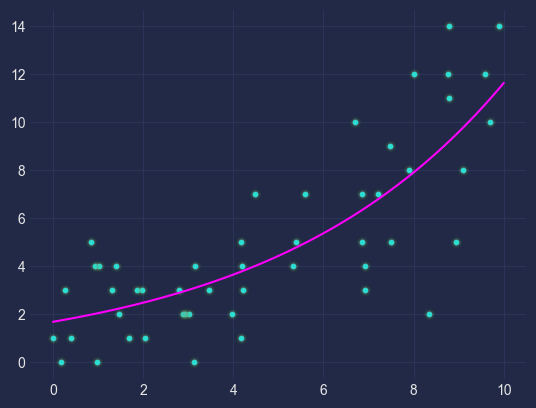

In [28]:
# scikit-learnのTweedieRegressorクラスからインスタンスを呼び出す
model = TweedieRegressor(fit_intercept=True, power=1, link='log')

# 過去のデータを最もよく説明する最適なパラメータを探索
# y = w0 + w1x  の w0～w1 を算出
model.fit(x[:, np.newaxis], y)

# モデルが推定したパラメータ値を確認
# 切片(バイアス)　w0
print(model.intercept_)
# 係数パラメータ　w1
print(model.coef_)

# 最適なパラメータを使って出力の予測値を生成
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, s=10)
plt.plot(xfit, yfit, color='magenta')
mplcyberpunk.make_scatter_glow()

##### **回答欄7**
scikit-learnのTweedieRegressorクラスの解説ページを確認し，リンク関数を対数関数（y=log(x)）（すなわち，逆リンク関数を指数関数（y=exp(x)））に設定してください．<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html

In [ ]:
# scikit-learnのTweedieRegressorクラスからインスタンスを呼び出す
model = TweedieRegressor(fit_intercept=True, power=1, link=)

# 過去のデータを最もよく説明する最適なパラメータを探索
# y = w0 + w1x  の w0～w1 を算出
model.fit(x[:, np.newaxis], y)

# モデルが推定したパラメータ値を確認
# 切片(バイアス)　w0
print(model.intercept_)
# 係数パラメータ　w1
print(model.coef_)

# 最適なパラメータを使って出力の予測値を生成
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, s=10)
plt.plot(xfit, yfit, color='magenta')
mplcyberpunk.make_scatter_glow()

### 3.　一般化線形モデル（ロジスティック回帰）

(array([  0., 449.,   0., 551.,   0.]),
 array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <BarContainer object of 5 artists>)

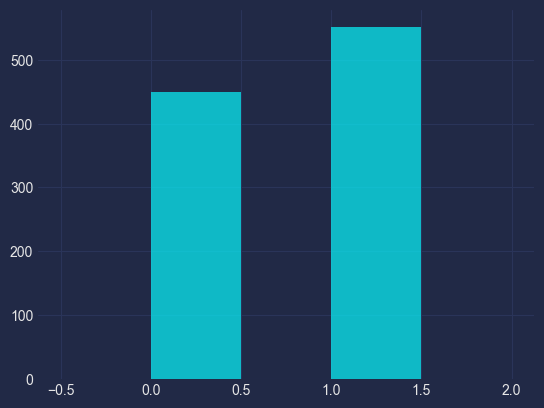

In [30]:
k = stats.bernoulli.rvs(p=0.53, size=1000, random_state=0)

#k = stats.poisson.rvs(2, size=1000, random_state=0)

# 階級値の設定
bins = np.arange(-0.5, 2.5, 0.5)

plt.style.use("cyberpunk")
plt.hist(k, bins, rwidth=1.0, alpha=0.7)

##### **問8：ロジスティック回帰**
正解の出力,つまり　y　の値が {0, 1} の離散値をとる人工データを作成してください．<br>
また，作成した人工データをプロットしてください．

##### **例8**

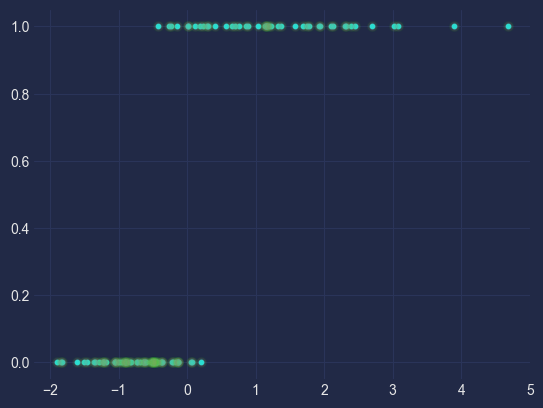

In [38]:
xmin, xmax = -5, 5
# 平均 0 ，標準偏差 1 の標準正規分布から100個の乱数を生成
x = np.random.normal(size=100)
# x>0 なら 1 , X<0 なら 0 の系列を生成
y = (x > 0).astype(float)
x[x > 0] *= 2
x += 0.3 * np.random.normal(size=100)

plt.style.use("cyberpunk")
plt.scatter(x, y, s=10)
mplcyberpunk.make_scatter_glow()

##### **回答欄8**
x>0 なら 1 , X<0 なら 0 の系列を生成してください．

In [36]:
xmin, xmax = -5, 5
# 平均 0 ，標準偏差 1 の標準正規分布から100個の乱数を生成
x = np.random.normal(size=100)
# x>0 なら 1 , X<0 なら 0 の系列を生成
y = ().astype(float)
x[x > 0] *= 2
x += 0.3 * np.random.normal(size=100)

plt.style.use("cyberpunk")
plt.scatter(x, y, s=10)
mplcyberpunk.make_scatter_glow()

AttributeError: 'tuple' object has no attribute 'astype'

##### **問9：出力が離散値（整数）の場合のロジスティック回帰モデル**
ロジスティック回帰モデルを作成し，観測データから推測した線形予測子のパラメータを確認してください．<br>

##### **例9**

[0.1768118]
[[6.14908582]]


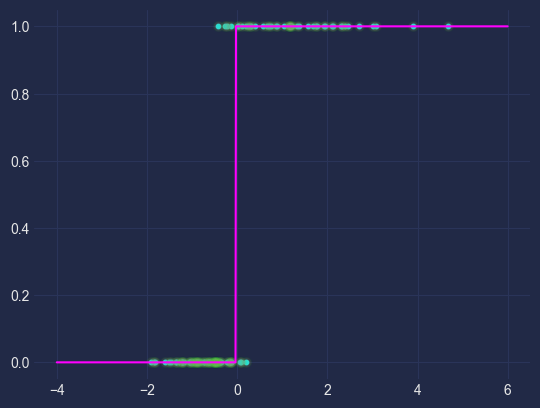

In [40]:
from sklearn.linear_model import LogisticRegression

# scikit-learnのLogisticRegressionクラスからインスタンスを呼び出す
model = LogisticRegression(fit_intercept=True, C=1e5)
model.fit(x[:, np.newaxis], y)

# モデルが推定したパラメータ値を確認
# 切片(バイアス)　w0
print(model.intercept_)
# 係数パラメータ　w1
print(model.coef_)

# 最適なパラメータを使って出力の予測値を生成
xfit = np.linspace(-4, 6, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, s=10)
plt.plot(xfit, yfit, color='magenta')
mplcyberpunk.make_scatter_glow()

##### **回答欄9**
scikit-learnのLogisticRegressionクラスの解説ページを確認し，penaltyやsolverのパラメータ値をdefaultから変えた場合の推計結果をプロットしてください<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

[0.1768118]
[[6.14908582]]


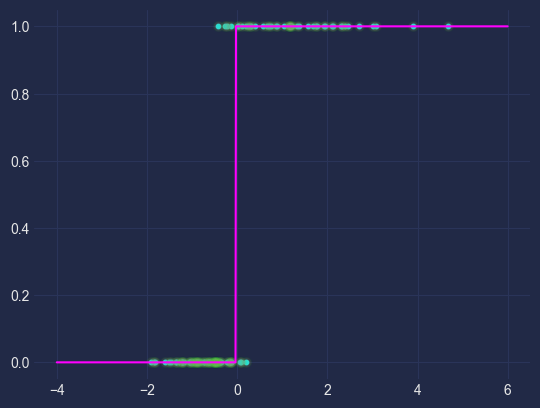

In [41]:
from sklearn.linear_model import LogisticRegression

# scikit-learnのLogisticRegressionクラスからインスタンスを呼び出す
model = LogisticRegression(fit_intercept=True, C=1e5, penalty=, solver=)
model.fit(x[:, np.newaxis], y)

# モデルが推定したパラメータ値を確認
# 切片(バイアス)　w0
print(model.intercept_)
# 係数パラメータ　w1
print(model.coef_)

# 最適なパラメータを使って出力の予測値を生成
xfit = np.linspace(-4, 6, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, s=10)
plt.plot(xfit, yfit, color='magenta')
mplcyberpunk.make_scatter_glow()

### 4.　階層ベイズモデル

In [60]:
np.random.seed(12)
# 地域グループの数
group_num = 9
#　　観測データ数
data_num = 25

#　　p(a), p(b)から地域の数だけ係数a，バイアスbを定義
a_vector = np.random.normal(1000.0, scale=100.0, size=group_num)
b_vector = np.random.normal(50000.0, scale=500.0, size=group_num)

# 観測データを各地域グループに割り当るためのidラベルを付与
group_idx = np.random.randint(0, group_num, data_num)
# 観測データを作成
x_data = np.random.uniform(20, 50, data_num)
y_data = a_vector[group_idx] * x_data + b_vector[group_idx] + np.random.normal(0, scale=1500.0, size=data_num)

group_idx = np.append(group_idx, 8)
x_data = np.append(x_data, 33.322)
y_data = np.append(y_data, 75004.54)

df_data = pd.DataFrame([x_data, y_data, group_idx]).T
df_data.columns = ['x', 'y', 'systemID']

df_coef = pd.DataFrame([a_vector, b_vector]).T
df_coef.columns = ['a', 'b']

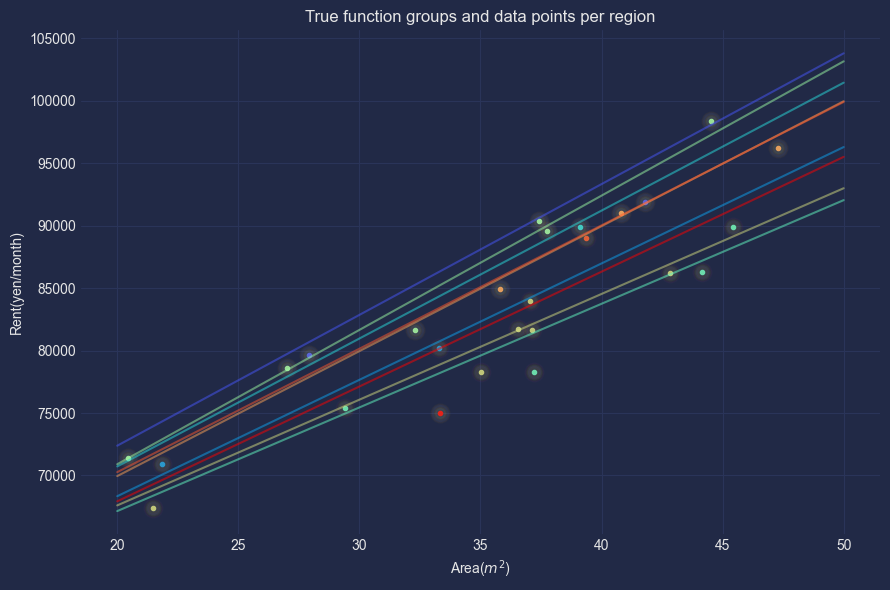

In [61]:
# 入力
x_data = df_data['x'].values
# 出力
y_data = df_data['y'].values
# 地域グループid
group_idx = df_data['systemID'].values.astype(int)
# 地域毎の傾きとバイアス
a_vector, b_vector = df_coef['a'].values, df_coef['b'].values

# 可視化用
x_linspace = np.linspace(20, 50, 100)

plt.style.use("cyberpunk")
fig, ax = plt.subplots(figsize=(9, 6))
cm10 = plt.get_cmap('rainbow', 10)
for i in range(9):
    # 真の関数可視化
    ax.plot(x_linspace, a_vector[i]*x_linspace+b_vector[i], color=cm10(i+1), alpha=0.5)
    # 学習データ可視化
    ax.scatter(x_data[group_idx==i], y_data[group_idx==i], marker='.', color=cm10(i+1))
    mplcyberpunk.make_scatter_glow()

ax.set_xlabel('Area($m^2$)');ax.set_ylabel('Rent(yen/month)')
ax.set_title('True function groups and data points per region')
plt.tight_layout()

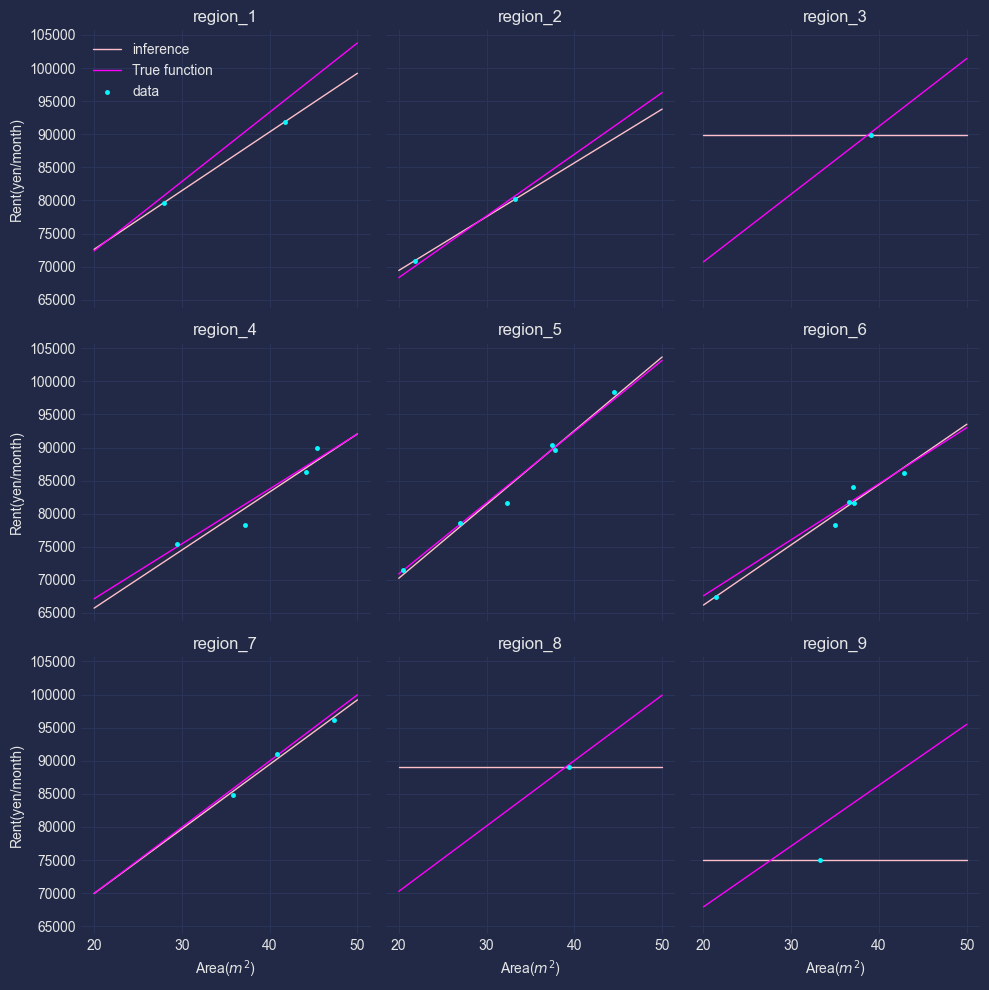

In [62]:
fig, ax = plt.subplots(figsize=(10, 10), ncols=3, nrows=3, sharex=True, sharey=True)
x_new = np.linspace(20, 50, 100)

# 地域グループ毎に処理
for i in range(9):
    row_index = i//3
    col_index  = i%3
    
    # 地域グループ取り出し
    x_i = x_data[group_idx==i]
    y_i = y_data[group_idx==i]
    # 線形回帰
    lr = LinearRegression()
    lr.fit(x_i.reshape(-1,1), y_i.reshape(-1,1))
    # 線形回帰可視化
    y_linear_model = lr.predict(x_new.reshape(-1,1))
    ax[row_index, col_index].plot(x_new, y_linear_model, color = 'pink', linewidth = 1, label='inference')
    # 真の関数可視化
    y_true = a_vector[i]*x_new+b_vector[i]
    ax[row_index, col_index].plot(x_new, y_true, color = 'magenta', linewidth = 1, label='True function')
    # 学習データ可視化
    ax[row_index, col_index].scatter(x_i, y_i, marker='.', s=25, zorder=2, label='data')
    
    ax[row_index, col_index].set_title('region_{}'.format(i+1))  
    if row_index==2:
        ax[row_index, col_index].set_xlabel('Area($m^2$)')
    if col_index==0:
        ax[row_index, col_index].set_ylabel('Rent(yen/month)')
        
    ax[0,0].legend()
    plt.tight_layout()

##### **問10：パラメータの事前分布，ハイパーパラメータの事前分布をもつ階層ベイズモデル**
通常のパラメータの事前分布に加えて，ハイパーパラメータの事前分布をもつ階層ベイズモデルを作成してください．<br>

##### **例10**

In [63]:
# モデルの定義
with pm.Model() as model:

    # 説明変数
    X_shared = pm.Data("x", x_data)

    # 傾きについてのハイパーパラメータの事前分布
    a_mu = pm.Normal('a_mu', mu=50.0, sigma=10.0)
    a_sigma = pm.HalfCauchy('a_sigma', beta=100.0)

    # 地域毎の傾き
    a_offset = pm.Normal('a_offset', mu=a_mu, sigma=a_sigma, shape=group_num)

    # バイアスについてのハイパーパラメータの事前分布
    b_mu = pm.Normal('b_mu', mu=50000.0, sigma=1000.0)
    b_sigma = pm.HalfCauchy('b_sigma', beta=1000.0)
    
    # 地域毎のバイアス
    b_offset = pm.Normal('b_offset', mu=b_mu, sigma=b_sigma, shape=group_num)

    # 尤度関数
    y = pm.Normal('y', mu=a_offset[group_idx]*X_shared + b_offset[group_idx], sigma=1000, observed=y_data)

##### **回答欄10**

In [ ]:
# モデルの定義
with pm.Model() as model:

    # 説明変数
    X_shared = pm.Data("x", x_data)

    # 傾きについてのハイパーパラメータの事前分布
    a_mu = pm.Normal('a_mu', mu=50.0, sigma=10.0)
    a_sigma = pm.HalfCauchy('a_sigma', beta=100.0)

    # 地域毎の傾き
    a_offset = pm.Normal('a_offset', mu=, sigma=, shape=group_num)

    # バイアスについてのハイパーパラメータの事前分布
    b_mu = pm.Normal('b_mu', mu=50000.0, sigma=1000.0)
    b_sigma = pm.HalfCauchy('b_sigma', beta=1000.0)
    
    # 地域毎のバイアス
    b_offset = pm.Normal('b_offset', mu=, sigma=, shape=group_num)

    # 尤度関数
    y = pm.Normal('y', mu=a_offset[group_idx]*X_shared + b_offset[group_idx], sigma=1000, observed=y_data)

In [64]:
with model:
    # MCMCによるベイズ推論の結果をtrace変数に保存
    trace = pm.sample(draws=3000, tune=1000, chains=3, random_seed=1, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [b_offset, b_sigma, b_mu, a_offset, a_sigma, a_mu]


/Users/Yusuke.Hayashi/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/Yusuke.Hayashi/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/Yusuke.Hayashi/Library/Python/3.9/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 1_000 tune and 3_000 draw iterations (3_000 + 9_000 draws total) took 13 seconds.
There were 346 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.40642653768609466, but should be close to 0.8. Try to increase the number of tuning steps.
There were 132 divergences after tuning. Increase `target_accept` or reparameterize.
The

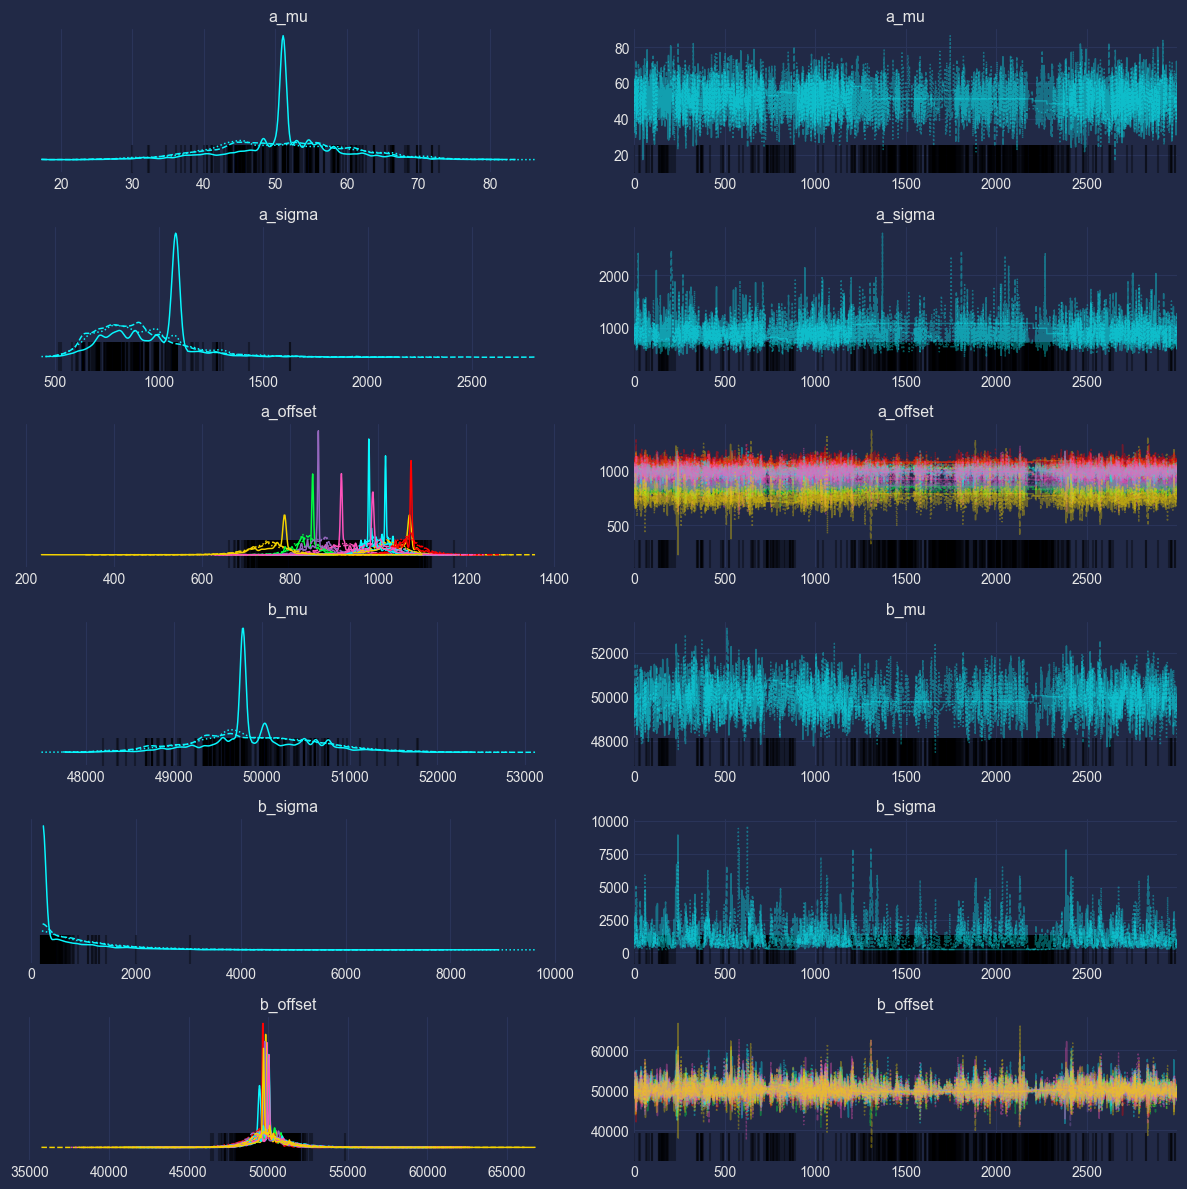

In [65]:
az.plot_trace(trace, var_names=['a_mu', 'a_sigma', 'a_offset', 'b_mu', 'b_sigma', 'b_offset']);
plt.tight_layout();

In [66]:
for var_info in az.rhat(trace).values():
  print(var_info.name, var_info.values.round(3))

a_mu 1.086
a_offset [1.092 1.097 1.042 1.01  1.046 1.103 1.045 1.085 1.012]
b_mu 1.077
b_offset [1.011 1.044 1.103 1.038 1.082 1.082 1.099 1.099 1.038]
a_sigma 1.021
b_sigma 1.074


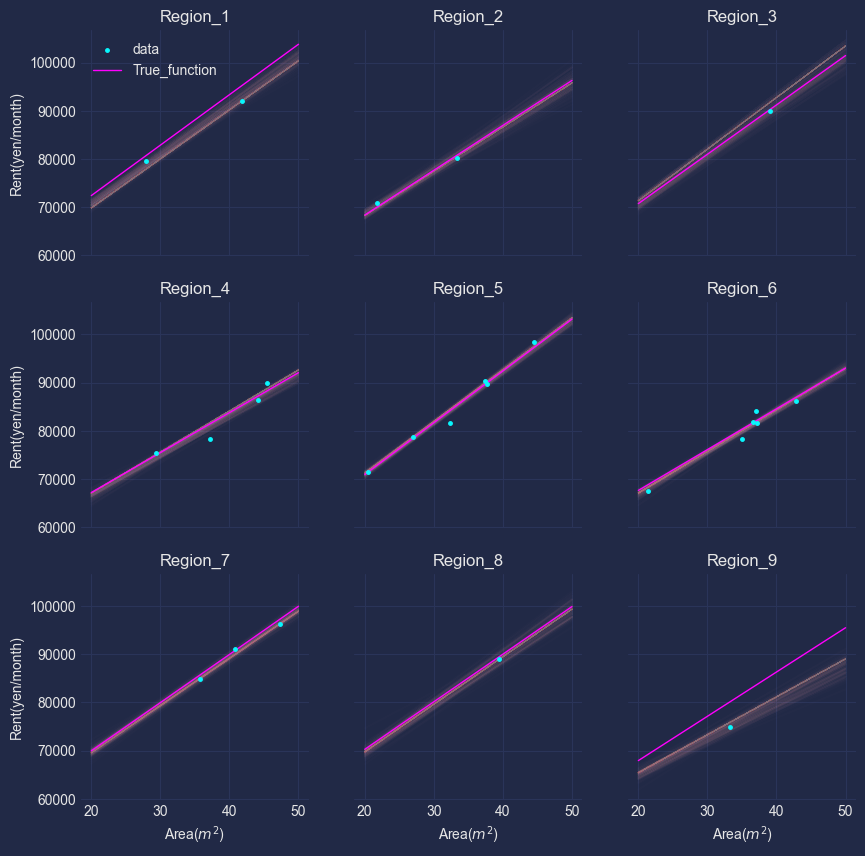

In [68]:
fig, ax = plt.subplots(figsize=(10, 10), ncols=3, nrows=3, sharex=True, sharey=True)
x_new = np.linspace(20, 50, 100)

# 地域グループ毎に処理
for i in range(9):
  row_index = i//3
  col_index  = i%3

  # 地域ごとの係数パラメータのMCMCサンプル平均値と標準偏差を算出
  a_i_mcmc_samples = trace.posterior['a_offset'][0, :, i]
  b_i_mcmc_samples = trace.posterior['b_offset'][0, :, i]
  
  # 学習データ可視化
  x_i = x_data[group_idx==i]
  y_i = y_data[group_idx==i]
  ax[row_index, col_index].scatter(x_i, y_i, marker='.', zorder=3, s=25, label='data')
  
  # MCMCサンプルを使って予測分布の平均を可視化
  for k in range(0, 3000, 15):
    y_new_sample = a_i_mcmc_samples[k].values * x_new + b_i_mcmc_samples[k].values
    ax[row_index, col_index].plot(x_new, y_new_sample, alpha=0.01, color ='pink', zorder=1)
    
  # 真の関数可視化
  y_true = a_vector[i]*x_new+b_vector[i]
  ax[row_index, col_index].plot(x_new, y_true, color = 'magenta',\
  linewidth = 1, label='True_function')
  
  ax[row_index, col_index].set_title('Region_{}'.format(i+1))
  if row_index==2:
    ax[row_index, col_index].set_xlabel('Area($m^2$)')
  if col_index==0:
    ax[row_index, col_index].set_ylabel('Rent(yen/month)')
    
ax[0, 0].legend();

### 5. ガウス過程回帰モデル

Text(0, 0.5, '$y$')

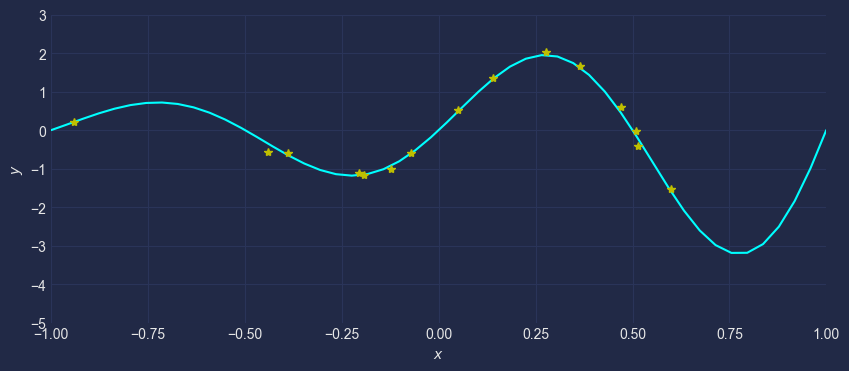

In [70]:
torch.manual_seed(1)

# データ数
N = 15
# 説明変数（一様分布からサンプリング）
x_data = torch.FloatTensor(N).uniform_(-1, 1)

# 真の関数
def true_func(x):
    return 1.5*torch.exp(x) * torch.sin(2*torch.pi * x)

# 目的変数
y_data = true_func(x_data) + 0.1*torch.randn(N)

x_line = torch.linspace(-1, 1, 50)
y_line = true_func(x_line)

plt.style.use("cyberpunk")
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(x_line, y_line, color='cyan', label='True function')
ax.plot(x_data, y_data, 'y*', label='Observed Data')
ax.set_xlim(-1, 1)
ax.set_ylim(-5, 3)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

##### **問11：ガウス過程回帰モデルの作成**
GPyTorchのExactGPModelクラスがガウス過程回帰モデルに対応することを確認してください．<br>
https://docs.gpytorch.ai/en/stable/models.html

##### **例11**

In [71]:
# ガウス過程回帰モデルの実装
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        # 平均関数
        self.mean_module = gpytorch.means.ConstantMean()
        # カーネル関数（RBFカーネルを採用）
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
    
    # ガウス過程の生成過程
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# 尤度にガウス分布を設定
likelihood = gpytorch.likelihoods.GaussianLikelihood()
# モデルのインスタンス化
model = ExactGPModel(x_data, y_data, likelihood)

##### **問12：ガウス過程回帰モデルの作成**
ガウス過程回帰モデルが未学習の状態でどのような予測を生成するのかを確認してください．

##### **例12**

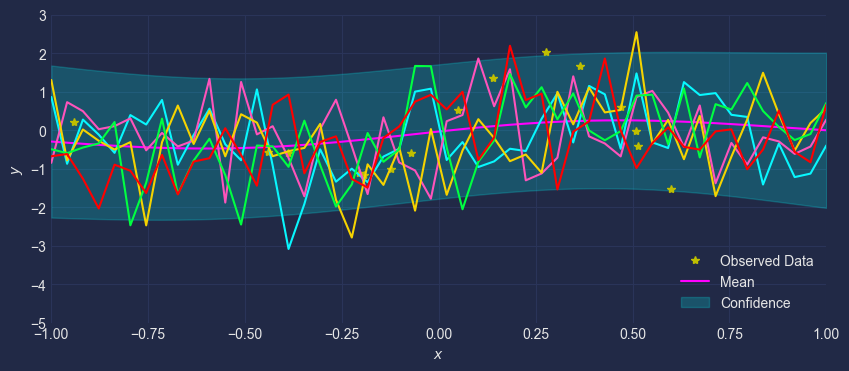

In [26]:
# 推論モードに設定
model.eval()
likelihood.eval()

with torch.no_grad(), gpytorch.settings.fast_pred_var():
    # テストデータの用意
    x_new = torch.linspace(-1, 1, 50)
    # 予測分布の出力
    prediction = likelihood(model(x_new))
    # 信用区間の出力
    lower, upper = prediction.confidence_region()

# 未学習状態のガウス過程回帰モデルで予測する
plt.style.use("cyberpunk")
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(x_data.numpy(), y_data.numpy(), 'y*', label='Observed Data')
ax.plot(x_new.numpy(), prediction.mean.numpy(), color='magenta', label='Mean')
for i in np.arange(5):
    ax.plot(x_new.numpy(), prediction.sample().numpy())
ax.fill_between(x_new.numpy(), lower.numpy(), upper.numpy(), alpha=0.2, color='cyan' ,label='Confidence')
ax.set_xlim(-1, 1)
ax.set_ylim(-5, 3)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(bbox_to_anchor=(1,0), loc="lower right");

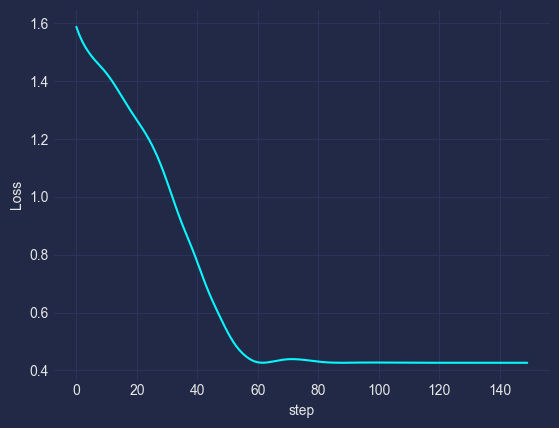

In [27]:
# ガウス過程回帰モデルはパラメータを持たないノンパラメトリックモデル
# だが，ハイパーパラメータは持っているので，ハイパーパラメータの学習モードに設定
model.train()
likelihood.train()

# optimizerにAdamを設定
optimizer = torch.optim.Adam(model.parameters(), lr=0.1) 

# 周辺対数尤度の計算
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

training_iter = 150
loss_list = []
for i in range(training_iter):
    # 勾配を0に初期化
    optimizer.zero_grad()
    # モデルからの出力
    output = model(x_data)
    # 損失関数の計算
    loss = -mll(output, y_data)
    # 勾配計算
    loss.backward()
    # パラメータ更新
    optimizer.step()
    loss_list.append(loss.detach().numpy())

plt.style.use("cyberpunk")
plt.plot(loss_list)
plt.xlabel('step')
plt.ylabel('Loss');

##### **問13：ガウス過程回帰モデルの作成**
ガウス過程回帰モデルが学習後の状態でどのような予測を生成するのかを確認してください．

##### **例13**

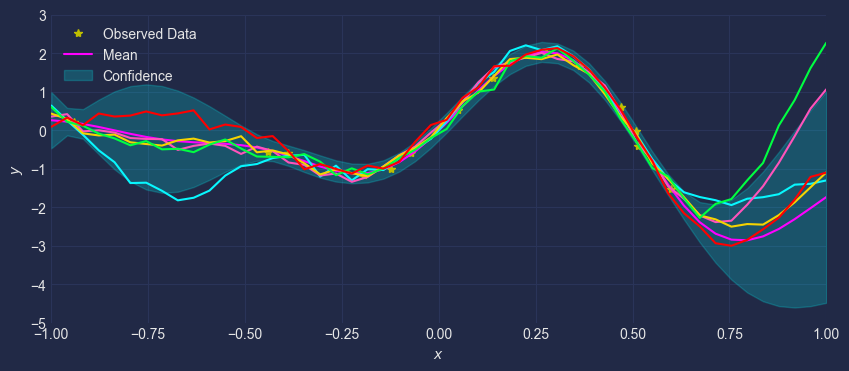

In [29]:
# ガウス過程から生成したモデルを表示
plt.style.use("cyberpunk")
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(x_data.numpy(), y_data.numpy(), 'y*', label='Observed Data')
ax.plot(x_new.numpy(), prediction.mean.numpy(), color='magenta', label='Mean')
# ガウス過程から5つのモデルを生成
for i in np.arange(5):
    ax.plot(x_new.numpy(), prediction.sample().numpy())
ax.fill_between(x_new.numpy(), lower.numpy(), upper.numpy(), alpha=0.2, color='cyan' ,label='Confidence')
ax.set_xlim(-1, 1)
ax.set_ylim(-5, 3)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend();

In [ ]:
%load_ext watermark
%watermark --iversions